# Simulated Annaeling for Travel Salesman problem

In [283]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [284]:
def plot_tarvel_salesman_problem(paths, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    """

    # Unpack the primary Travel Salesman Problem path and transform it into a list of ordered
    # coordinates

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])

    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads
    a_scale = float(max(x))/float(100)


    # Draw the primary path for the Travel Salesman Problem  problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(min(x)*1.1, max(x)*1.1)
    plt.ylim(min(y)*1.1, max(y)*1.1)
    plt.show()

In [285]:
class SimulatedAnnealing:
    def __init__(self, coords, stopping_iter, T=-1, alpha=-1, stopping_T=-1):
        self.coords = coords
        self.N = len(coords)
        self.T = math.sqrt(self.N) if T == -1 else T
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-8 if stopping_T == -1 else stopping_T
        self.stopping_iter = stopping_iter
        self.iteration = 1

        self.nodes = [i for i in range(self.N)] # holds the index of all coordinate values starting from 0 to length of the coords
        
        self.best_solution = None
        self.best_fitness = float("Inf") # "Inf" stores an infinite value, it acts as an unbounded upper value for comparison. This is useful for finding lowest values for something
        self.fitness_list = []

    def initial_solution(self):
        """
        Greedy algorithm to get an initial solution (closest-neighbour).
        """
        cur_node = random.choice(self.nodes)  # start from a random node
        solution = [cur_node]
        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
     
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.calculate_distance(cur_node, x))  # find nearest neighbour starting from current node until free node is empty    
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node
               
        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:  # If best found so far, update best fitness
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit

    def calculate_distance(self, node_0, node_1):
        """
        Euclidean distance between two nodes.
        """
        coord_0, coord_1 = self.coords[node_0], self.coords[node_1]
        return math.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)

    def fitness(self, solution):
        """
        To calculate the total distance of the weight of the route.
        """
        cur_fit = 0
        for i in range(self.N):
            cur_fit += self.calculate_distance(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit

    def probability_of_acceptance(self, candidate_fitness):
        """
        Probability of accepting if the candidate is worse than current.
        Depends on the current temperature and difference between candidate and current.
        """
        return math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)

    def accept(self, candidate):
        """
        Accept with probability 1 if candidate is better than current.
        Accept with probabilty p_accept(..) if candidate is worse.
        """
        candidate_fitness = self.fitness(candidate)
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.probability_of_acceptance(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate

    def anneal(self):
        """
        Execute simulated annealing algorithm.
        """
        # Initialize with the greedy solution.
        self.cur_solution, self.cur_fitness = self.initial_solution()
        
        # plot the initial path.
        print("Before the annealing process for TSP.")
        self.result("Initial")
        self.visualize_routes()
             
        # Starting annealing
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.accept(candidate)
            self.T *= self.alpha
            self.iteration += 1

            self.fitness_list.append(self.cur_fitness)

    def result(self, name):
        print(name + " best fitness obtained: ", self.best_fitness)
        if name == "Final":
            improvement = 100 * (self.fitness_list[0] - self.best_fitness) / (self.fitness_list[0])
            print(f"Improvement over greedy heuristic: {improvement : .2f}%")

  
    def visualize_routes(self):
        """
        Visualize the TSP route with matplotlib.
        """
        plt.figure(figsize=(10,7))
        plot_tarvel_salesman_problem([self.best_solution], self.coords)

    def plot_learning(self):
        """
        Plot the fitness through iterations.
        """
        plt.figure(figsize=(10,7))
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel("Fitness")
        plt.xlabel("Iteration")
        plt.show()

    def plot_cities(self):
        """
        Plot the fitness through iterations.
        """
        coordinates = np.array(self.coords)
        plt.figure(figsize=(10,7))
        plt.scatter(coordinates[:,0],coordinates[:,1],s=10)
        plt.title('150 cities')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

In [286]:
def read_coords(path):
    coords = []
    with open(path, "r") as f:
        for line in f.readlines():
            line = [float(x.replace("\n", "")) for x in line.split(" ")]
            coords.append(line)
    return coords

### Generate random coordinates for the cities.

In [287]:
def generate_random_coords(num_nodes):
    return [[random.uniform(-800, 800), random.uniform(-800, 800)] for i in range(num_nodes)]

With parametrs of stopping Iteration = 20000, 150 coordinnates, T = square root of number of nodes, alpha = 0.995, stopping_temperature = 1e-8


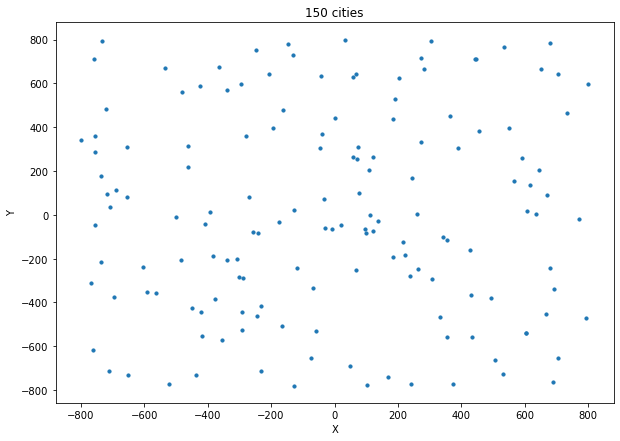

Before the annealing process for TSP.
Initial best fitness obtained:  19669.27328536961


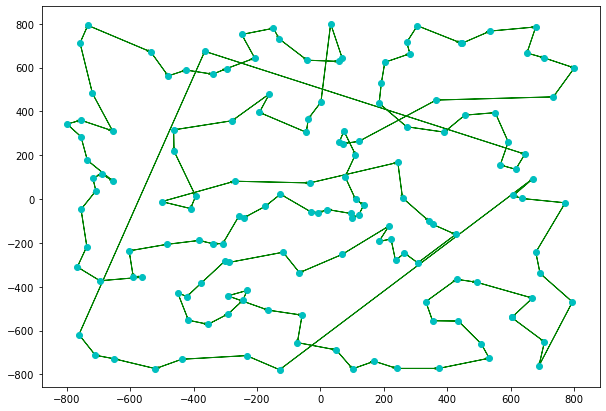

After simulated annealing for TSP.
Final best fitness obtained:  18974.516595269193
Improvement over greedy heuristic:  3.53%


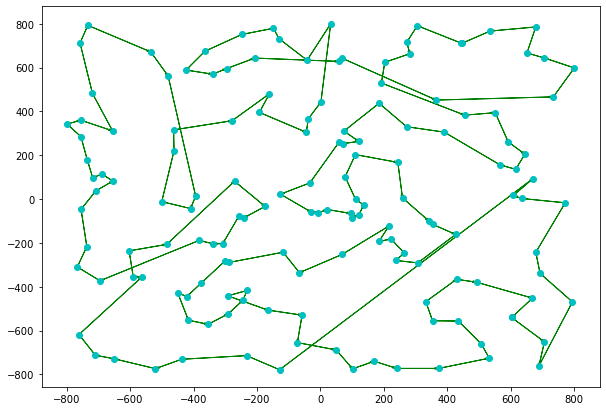

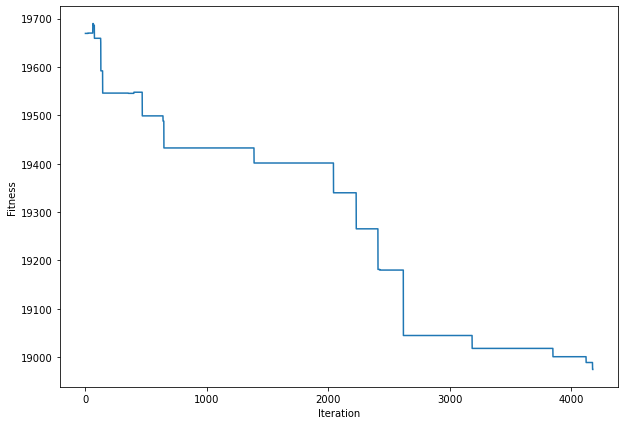

In [288]:
coords =   generate_random_coords(150) #read_coords("coord.txt") 
print("With parametrs of stopping Iteration = 20000, 150 coordinnates, T = square root of number of nodes, alpha = 0.995, stopping_temperature = 1e-8")
sa = SimulatedAnnealing(coords, 20000)
sa.plot_cities()
sa.anneal()
print("After simulated annealing for TSP.")
sa.result("Final")
sa.visualize_routes()
sa.plot_learning()



With parametrs of stopping Iteration = 80000, 150 coordinnates, T = square root of number of nodes, alpha = 0.995, stopping_temperature = 1e-8


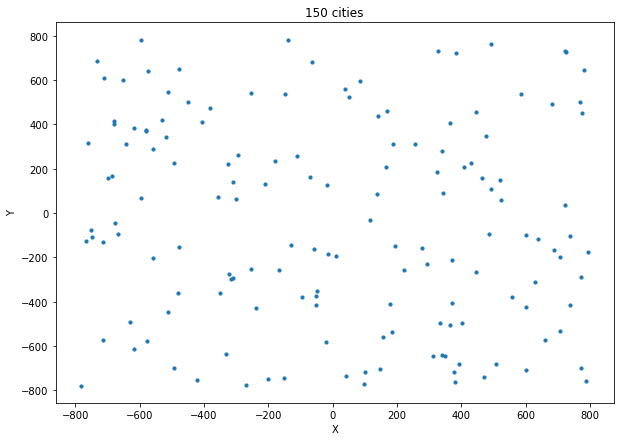

Before the annealing process for TSP.
Initial best fitness obtained:  18774.51463504069


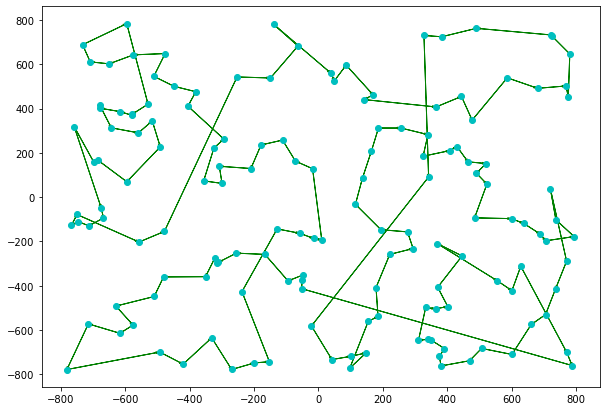

After simulated annealing for TSP.
Final best fitness obtained:  17465.447065687178
Improvement over greedy heuristic:  6.97%


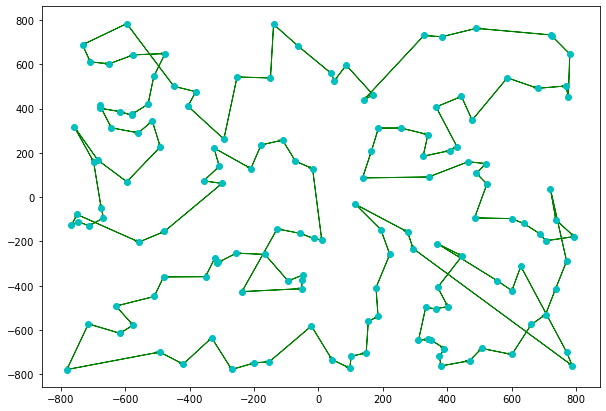

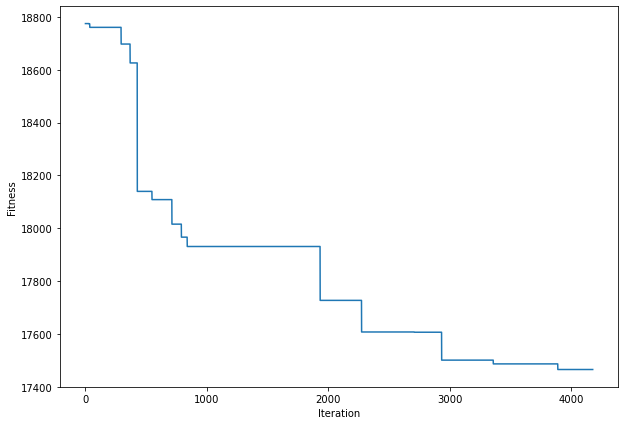

In [289]:

coords =   generate_random_coords(150) #read_coords("coord.txt") 
print("With parametrs of stopping Iteration = 80000, 150 coordinnates, T = square root of number of nodes, alpha = 0.995, stopping_temperature = 1e-8")
sa1 = SimulatedAnnealing(coords, 80000)
sa1.plot_cities()
sa1.anneal()
print("After simulated annealing for TSP.")
sa1.result("Final")
sa1.visualize_routes()
sa1.plot_learning()
